In [76]:
import pandas as pd

# Data loading and preprocessing

## Positive Pairs

In [138]:
positive_mapped = '../data/NP_FAERS_mapped_20220215.csv'
positive_unmapped = '../data/positive-unmapped-pairs-common-name-or-latin-binomial-copies.tsv'

# Average NP name length 

In [142]:
pd.read_csv(positive_unmapped, sep='\t')

,common_name,latin_binomial
0,PRUNUS SPINOSA,PRUNUS SPINOSA
1,PHYTOLACCA AMERICANA,PHYTOLACCA AMERICANA
2,SMILAX PSEUDOCHINA,SMILAX PSEUDOCHINA
3,HARUNGANA MADAGASCARIENSIS,HARUNGANA MADAGASCARIENSIS
4,QUERCUS LOBATA,QUERCUS LOBATA
...,...,...
723,LINARIA VULGARIS,LINARIA VULGARIS
724,CASTANEA MOLLISSIMA,CASTANEA MOLLISSIMA
725,PLATANUS OCCIDENTALIS,PLATANUS OCCIDENTALIS
726,SOLANUM LINNAEANUM,SOLANUM LINNAEANUM


In [141]:
main_dataset = pd.read_csv(positive_mapped)
main_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5358 entries, 0 to 5357
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   FAERS_drug_match  5358 non-null   object
 1   lookup_value      5358 non-null   object
dtypes: object(2)
memory usage: 83.8+ KB


In [100]:
stats = main_dataset.applymap(len).describe()
stats

,FAERS_drug_match,lookup_value
count,5358.000000,5358.000000
mean,29.634192,13.597798
std,30.235721,4.743530
min,3.000000,4.000000
25%,15.000000,9.000000
50%,22.000000,14.000000
75%,37.000000,18.000000
max,489.000000,24.000000


In [101]:
stats = stats["FAERS_drug_match"]
stats["mean"] + stats["std"] * 2

90.10563333041236

In [84]:
main_dataset['FAERS_drug_match'].apply(len).sort_values(ascending=False)[:10]

5132    489
2453    489
5131    482
2452    482
5133    472
2454    472
1098    364
3777    364
65      364
582     364
Name: FAERS_drug_match, dtype: int64

In [92]:
main_dataset['FAERS_drug_match'].apply(len).gt(100).describe()

count      5358
unique        2
top       False
freq       5288
Name: FAERS_drug_match, dtype: object

In [93]:
print("Gt 65:", 5358 - 4984)
print("Gt 70:", 5358 - 5212)
print("Gt 80:", 5358 - 5238)
print("Gt 90:", 5358 - 5258)
print("Gt 100:", 5358 - 5288)

Gt 65: 374
Gt 70: 146
Gt 80: 120
Gt 90: 100
Gt 100: 70


<AxesSubplot:>

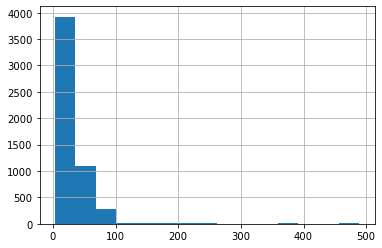

In [87]:
%matplotlib inline
main_dataset['FAERS_drug_match'].apply(len).hist(bins=15)

In [88]:
longest = main_dataset['FAERS_drug_match'].apply(len).idxmax()
main_dataset.loc[longest, 'FAERS_drug_match']

"WOMEN'S MULTI (ASCORBIC ACID, BETACAROTENE, BIOTIN, CALCIUM AMINO ACID CHELATE, CALCIUM PANTOTHENATE, CHROMIUM AMINO ACID CHELATE, COPPER AMINO ACID CHELATE, CYANOCOBALAMIN, EQUISETUM ARVENSE STEM, FERROUS FUMARATE, FOLIC ACID, LAMINARIA DIGITATA POWDER, MAGNESIUM OXIDE, MANGANESE AMINO ACID CHELATE, NICOTINAMIDE, OENOTHERA BIENNIS OIL, POTASSIUM AMINO ACID CHELATE, PYRIDOXINE HYDROCHLORIDE, RIBOFLAVIN, SELENIUM AMINO ACID CHELATE, THIAMINE MONONITRATE, ZINC AMINO ACID CHELATE) TABLET"

---

## Negative Pairs

In [94]:
negatives_pairs = '../data/NP_FAERS_negative_pairs_20220222.csv'

In [95]:
negative_dataset = pd.read_csv(negatives_pairs)
negative_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9242 entries, 0 to 9241
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   FAERS_drug_match  9242 non-null   object
 1   lookup_value      9242 non-null   object
dtypes: object(2)
memory usage: 144.5+ KB


In [98]:
negative_dataset.applymap(len).describe()

,FAERS_drug_match,lookup_value
count,9242.000000,9242.000000
mean,31.856525,12.881519
std,26.421282,4.110360
min,1.000000,4.000000
25%,10.000000,9.000000
50%,25.000000,14.000000
75%,50.000000,16.000000
max,500.000000,24.000000


## Test sets

In [129]:
unmapped_overlap = '../unmapped_data/upper_unmap_orig_drug_names_202201201812.csv'
unmapped_no = '../data/upper_unmap_orig_drug_names_no_model_overlap_20220224.csv'

In [130]:
overlap = pd.read_csv(unmapped_overlap)
overlap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569525 entries, 0 to 569524
Data columns (total 1 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   drug_name_original  412264 non-null  object
dtypes: object(1)
memory usage: 4.3+ MB


In [131]:
overlap.head()

,drug_name_original
0,ACRINOL HYDRATE
1,MAXAZIDE/TRIAMTEREN HCTZ
2,KETOBEMIDONE (KETOGAN) (KETOGIN)
3,TYLENOL XTRA STRENGTH
4,MINOCYCLINE(MINOCYLCINE HYDROCHLORIDE)


In [132]:
no_overlap = pd.read_csv(unmapped_no)
no_overlap.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405332 entries, 0 to 405331
Data columns (total 1 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   FAERS_drug_match  405332 non-null  object
dtypes: object(1)
memory usage: 3.1+ MB


In [133]:
no_overlap.head()

,FAERS_drug_match
0,ACRINOL HYDRATE
1,MAXAZIDE/TRIAMTEREN HCTZ
2,KETOBEMIDONE (KETOGAN) (KETOGIN)
3,TYLENOL XTRA STRENGTH
4,MINOCYCLINE(MINOCYLCINE HYDROCHLORIDE)
